Build a regression model.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [22]:
#Load the joint .csv with citibikes and yelp locations.
df = pd.read_csv('vancouver_citibikes_and_yelp_locations_new.csv')

df_model = df.drop(columns='Unnamed: 0')

df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   empty_slots        20 non-null     int64  
 1   free_bikes         20 non-null     int64  
 2   citibike_id        20 non-null     object 
 3   citibike_station   20 non-null     object 
 4   yelp_id            20 non-null     object 
 5   yelp_name          20 non-null     object 
 6   yelp_review_count  20 non-null     int64  
 7   yelp_rating        20 non-null     float64
dtypes: float64(1), int64(3), object(4)
memory usage: 1.4+ KB


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

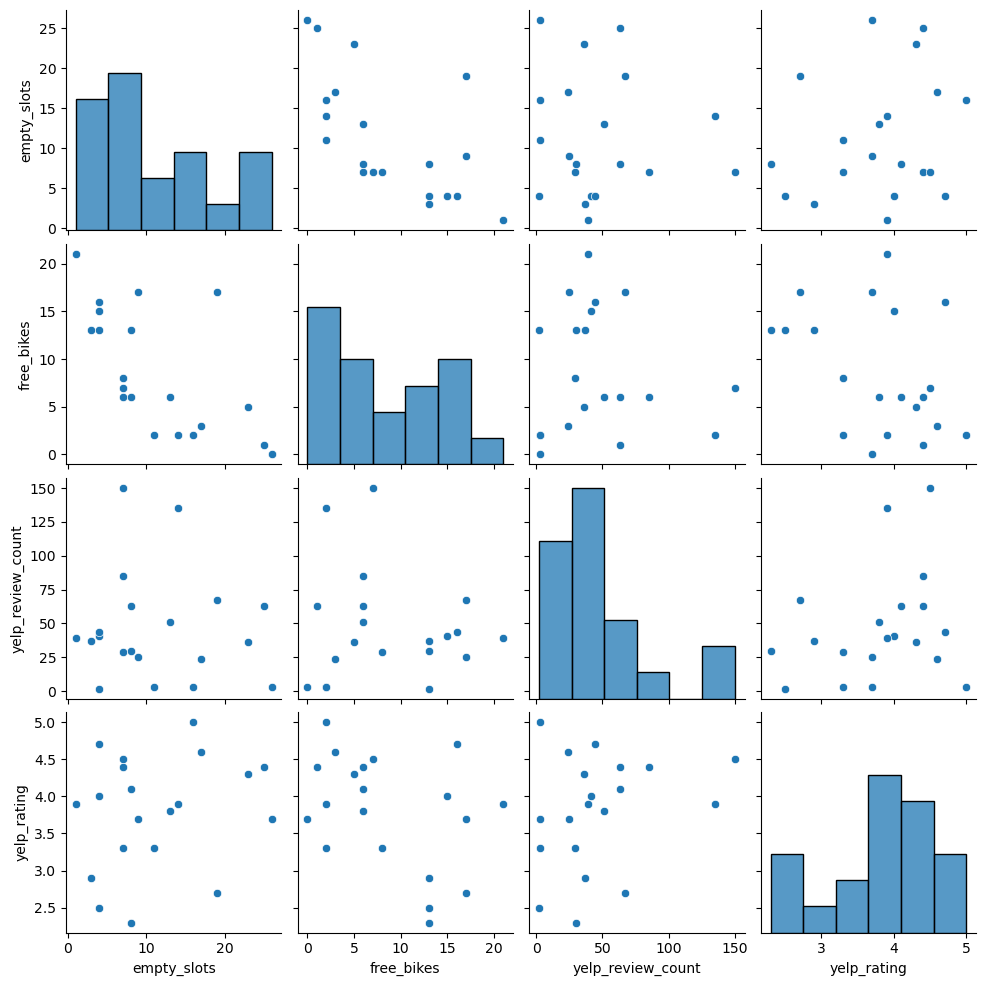

In [21]:
sns.pairplot(df_model) #Visualize pair of variables in the dataset via scatterplot.
plt.show()

Provide model output and an interpretation of the results. 

In [34]:
#Formula to fit and print results of the linear regression model.
X = df_model[['yelp_rating', 'yelp_review_count', 'empty_slots']] # These are identified as independent variables
y = df_model['free_bikes'] # This is identified as the dependent variable

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             free_bikes   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     5.000
Date:                Sat, 04 May 2024   Prob (F-statistic):             0.0124
Time:                        13:02:22   Log-Likelihood:                -58.382
No. Observations:                  20   AIC:                             124.8
Df Residuals:                      16   BIC:                             128.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                22.5596      5.87

In [36]:
"""
- The dependent variable is "free_bikes".
- The independent variables "empty_slots", "yelp_rating", and "yelp_review_count" are used to predict the dependent variable
"free_bikes" if there are any influences to the availablity of bikes.
- The adjusted R-squared is 0.387, which means 38.7% of the variance in the dependent variable is explained by the independent
variables.
- The F-statistic finds the signficiance of the regression model.  With a p-value greater than 0 means the model is not 
significant.
- The coefficients for each variable are negative, but the coefficients for 'yelp_review_count' and 'empty_slots' 
are closer to 0.
- The only p>[t] that is statistically signficant is the 'empty_slots', which would make sense given the availabity of 
bikes at a bike station.
"""

'\n- The dependent variable is "free_bikes".\n- The independent variables "empty_slots", "yelp_rating", and "yelp_review_count" are used to predict the dependent variable\n"free_bikes" if there are any influences to the availablity of bikes.\n- The adjusted R-squared is 0.387, which means 38.7% of the variance in the dependent variable is explained by the independent\nvariables.\n- The F-statistic finds the signficiance of the regression model.  With a p-value greater than 0 means the model is not \nsignificant.\n- The coefficients for each variable are negative, but the coefficients for \'yelp_review_count\' and \'empty_slots\' \nare closer to 0.\n- The only p>[t] that is statistically signficant is the \'empty_slots\', which would make sense given the availabity of \nbikes at a bike station.\n'

# Stretch

How can you turn the regression model into a classification model?

In [ ]:
"""
- Define the categories based on the availabity of bikes: 'available' as '1' or not 'available' as '0'.
- As the availabity of bikes is continous, a threshold could be applied to determine 'available' or 'not available'.  
For example, the 75% of empty slots could be deemed as 'not available'.
- Find decision boundaries to divide the dataset into different classes, such as time of day and weather.
"""